<a href="https://colab.research.google.com/github/GeulHae/GeulHae/blob/dev_dataAnalysis/8378(Cifar10).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras import Model

# 새 섹션

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [2]:
#데이터 세트를 불러옵니다.
cifar10 = tf.keras.datasets.cifar10

# 데이터 세트를 Train set과 Test set으로 나누어 줍니다.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# print(x_train.shape, x_test.shape)
# RGB 채널에 3이 들어가 있는 것을 확인 할 수 있다.

170498071/170498071 [==============================] - 7s 0us/step


In [3]:
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

# print(y_train[0])
# print(y_train[0].shape)

#flatten 과정을 거쳐 줘야 한다.
y_train = y_train.flatten()
y_test = y_test.flatten()

y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 1. 0.], shape=(10,), dtype=float32)


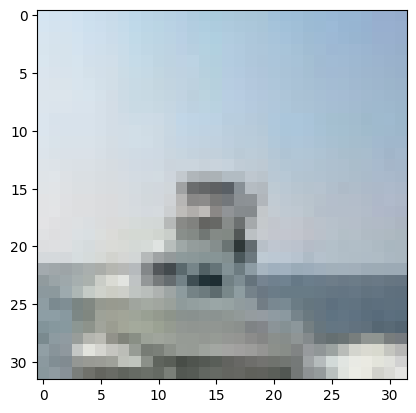

In [4]:
plt.imshow(x_train[100])
print(y_train[100])

In [9]:
def makeCNN():
  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, 3, padding='same', input_shape=(32, 32, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(256, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])


  model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=lr), metrics=['accuracy'])
  return model

In [10]:
batch_size = 64
# num_classes = 10
epochs = 5
lr = 0.0001

In [11]:
def main():

  model = makeCNN()

  hist = model.fit(x_train,
                   y_train,
                   batch_size=batch_size,  # default=32
                   epochs=20)
  
  fig, ax = plt.subplots(figsize=(14, 6))
  
  ax.plot(hist.history['accuracy'])
  plt.legend(['accuracy'])

  ax.set_xlabel('epoch')
  ax.set_ylabel('accuracy')
  
  loss, accuracy = model.evaluate(x_test, y_test)
  print('Accuracy = {:.4f}'.format(accuracy))
  result = {'hist':hist, 'accuracy':accuracy}
  return result

Epoch 1/20
782/782 [==============================] - 16s 16ms/step - loss: 1.8573 - accuracy: 0.3037
Epoch 2/20
782/782 [==============================] - 12s 15ms/step - loss: 1.4687 - accuracy: 0.4564
Epoch 3/20
782/782 [==============================] - 12s 15ms/step - loss: 1.2923 - accuracy: 0.5306
Epoch 4/20
782/782 [==============================] - 12s 15ms/step - loss: 1.1626 - accuracy: 0.5854
Epoch 5/20
782/782 [==============================] - 13s 16ms/step - loss: 1.0663 - accuracy: 0.6230
Epoch 6/20
782/782 [==============================] - 12s 15ms/step - loss: 0.9978 - accuracy: 0.6465
Epoch 7/20
782/782 [==============================] - 12s 15ms/step - loss: 0.9324 - accuracy: 0.6700
Epoch 8/20
782/782 [==============================] - 12s 15ms/step - loss: 0.8794 - accuracy: 0.6904
Epoch 9/20
782/782 [==============================] - 12s 15ms/step - loss: 0.8298 - accuracy: 0.7089
Epoch 10/20
782/782 [==============================] - 12s 15ms/step - loss: 0.779

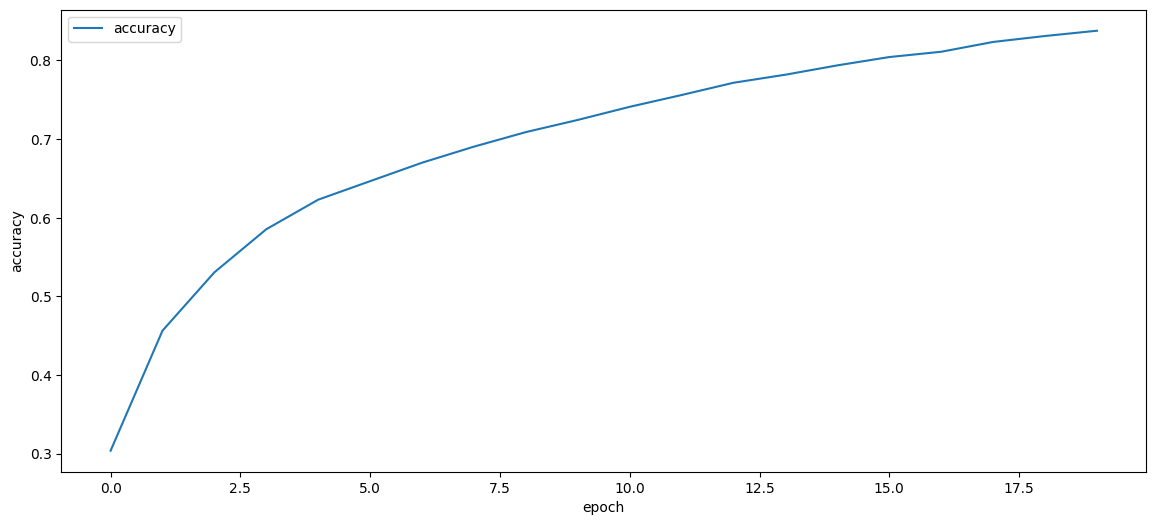

In [12]:
if __name__ == '__main__':
  main()